In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_df = pd.read_csv("./US_Accidents_Dec21_updated.csv")
#data_df=data_df.dropna()
df = pd.DataFrame(data_df)

In [2]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])

In [3]:
df['year'] = df["Start_Time"].dt.year
df["mon"] = df["Start_Time"].dt.month
df["day"] = df["Start_Time"].dt.day
df["dayofweek"] = df["Start_Time"].dt.day_of_week + 1
df["hour"] = df["Start_Time"].dt.hour

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 52 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Severity               int64         
 2   Start_Time             datetime64[ns]
 3   End_Time               object        
 4   Start_Lat              float64       
 5   Start_Lng              float64       
 6   End_Lat                float64       
 7   End_Lng                float64       
 8   Distance(mi)           float64       
 9   Description            object        
 10  Number                 float64       
 11  Street                 object        
 12  Side                   object        
 13  City                   object        
 14  County                 object        
 15  State                  object        
 16  Zipcode                object        
 17  Country                object        
 18  Timezone              

In [14]:
df[df["State"]=="CA"]["City"].value_counts().head(10)

Los Angeles       68956
Sacramento        32559
San Diego         26627
San Jose          13376
Riverside         12861
Bakersfield       12044
San Bernardino    11249
Anaheim           10502
Ontario            9719
Oakland            9255
Name: City, dtype: int64

In [6]:
df["State"].value_counts().values

array([795868, 401388, 149037, 126341, 113535, 108049,  99975,  97185,
        91362,  89216,  65085,  56504,  52902,  52613,  49193,  47232,
        47105,  43843,  40086,  32554,  29762,  29633,  25340,  24409,
        20850,  19322,  15964,  10935,   9607,   9133,   9033,   8806,
         8544,   7896,   7632,   6638,   6392,   6197,   5320,   4842,
         4451,   3866,   3320,   2370,   2258,   2193,    990,    365,
          201])

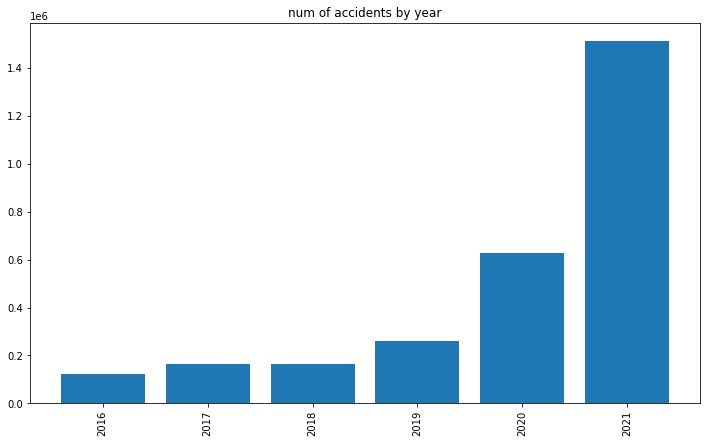

In [13]:
fig, ax = plt.subplots()
ax.bar(df["year"].value_counts().index,df["year"].value_counts().values)
plt.xticks(rotation=90)
fig.set_size_inches(12,7)
plt.title("num of accidents by year")
plt.show()

In [146]:

drop_year = [2016,2017,2018,2019,2020]
for i in drop_year:
    df_2021 = df.drop(df[df["year"]==i].index)

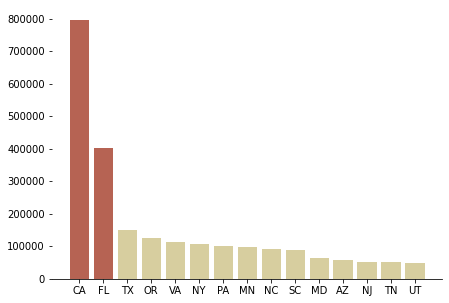

In [22]:
fig, ax = plt.subplots()
ax.bar(df["State"].value_counts().index[0:2],df["State"].value_counts().values[0:2],color="#B66353")
ax.bar(df["State"].value_counts().index[2:15],df["State"].value_counts().values[2:15],color="#D7CE9F")
fig.set_size_inches(7,5)
#plt.xticks(rotation=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.get_yaxis().set_ticks([])
plt.show()

In [255]:
df.columns[30:43]

Index(['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop'],
      dtype='object')

In [273]:
try:
    df['Turning_Loop'].value_counts(dropna=False)[1]
except:
    print(0)

0


In [276]:
for i in df.columns[30:43]:
    print(df[i].value_counts())

False    923353
True      19965
Name: Amenity, dtype: int64
False    942633
True        685
Name: Bump, dtype: int64
False    820660
True     122658
Name: Crossing, dtype: int64
False    941229
True       2089
Name: Give_Way, dtype: int64
False    939354
True       3964
Name: Junction, dtype: int64
False    940970
True       2348
Name: No_Exit, dtype: int64
False    932681
True      10637
Name: Railway, dtype: int64
False    943252
True         66
Name: Roundabout, dtype: int64
False    895504
True      47814
Name: Station, dtype: int64
False    909139
True      34179
Name: Stop, dtype: int64
False    942368
True        950
Name: Traffic_Calming, dtype: int64
False    814849
True     128469
Name: Traffic_Signal, dtype: int64
False    943318
Name: Turning_Loop, dtype: int64


In [16]:
facility_num = []
for i in df.columns[30:43]:
    n = 0 
    try:
        n = df[i].value_counts()[1]
    except:
        n = 0
    facility_num.append(int(n))

df_facility = pd.DataFrame(facility_num,index=df.columns[30:43],columns=["facility_num"])
df_facility.sort_values("facility_num",ascending=False,inplace=True)

In [17]:
df_facility.index[:9]

Index(['Junction', 'Traffic_Signal', 'Crossing', 'Station', 'Stop', 'Amenity',
       'Railway', 'Give_Way', 'No_Exit'],
      dtype='object')

In [20]:
df_facility.facility_num.values[:9]

array([290505, 265263, 200212,  67995,  50400,  27990,  22631,   6868,
         4294])

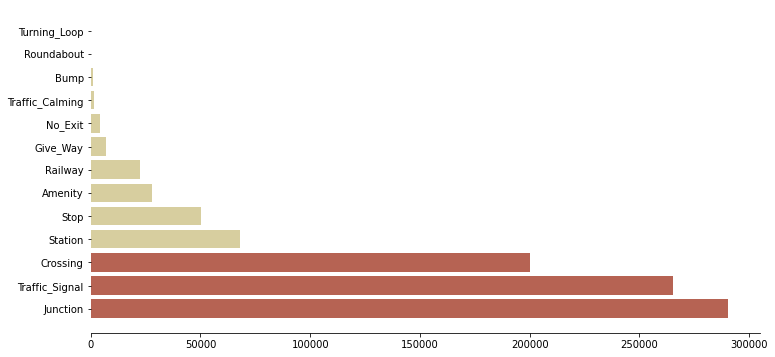

In [19]:
fig, ax = plt.subplots()
ax.barh(df_facility.index[0:3],df_facility.facility_num.values[0:3],color="#B66353")
ax.barh(df_facility.index[3:],df_facility.facility_num.values[3:],color='#D7CE9F')

fig.set_size_inches(12,6)
#plt.xticks(rotation=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.get_yaxis().set_ticks([])
plt.show()

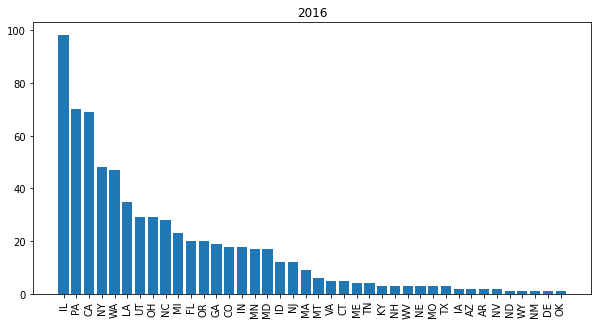

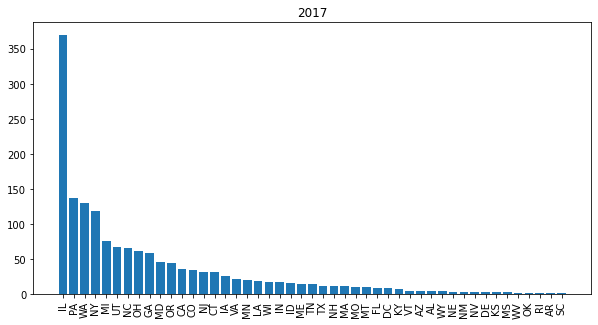

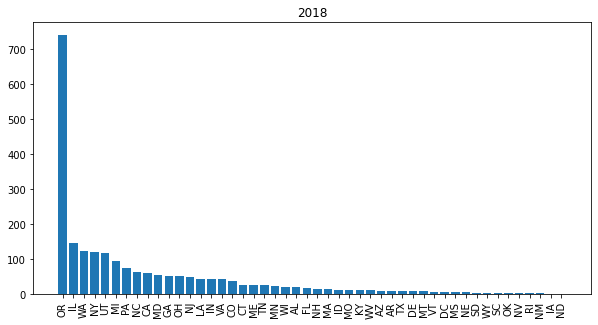

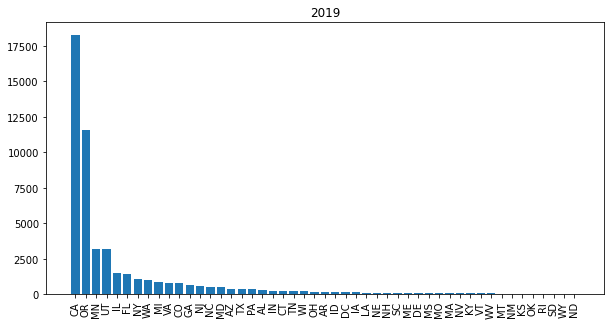

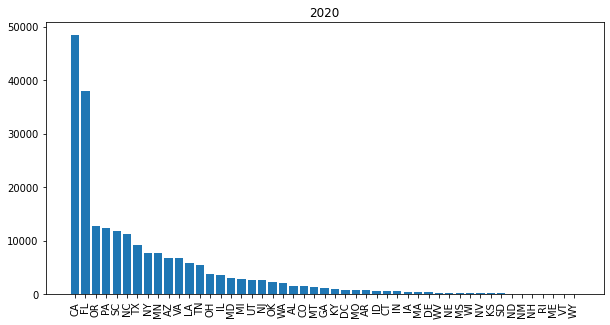

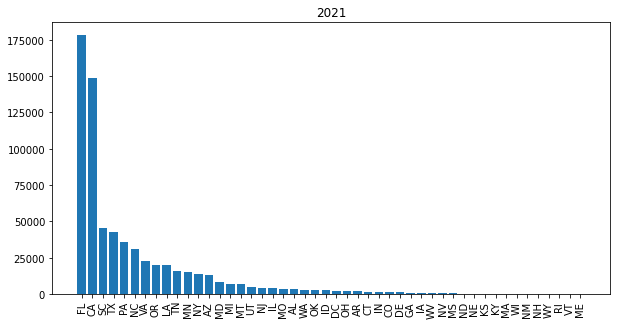

In [20]:
years = range(2016,2022)
for i in years:   
    fig, ax = plt.subplots()
    ax.bar(df[df["year"]==i]["State"].value_counts().index,df[df["year"]==i]["State"].value_counts().values)
    plt.xticks(rotation=90)
    fig.set_size_inches(10,5)
    plt.title(i)
    plt.show()

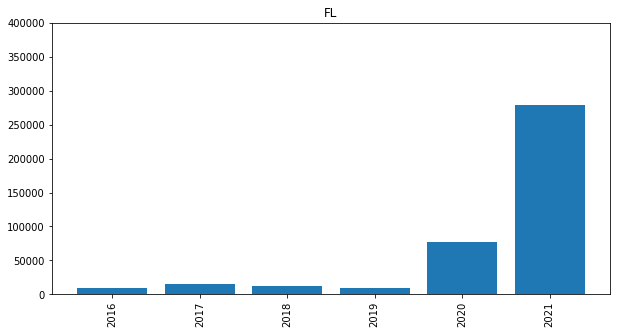

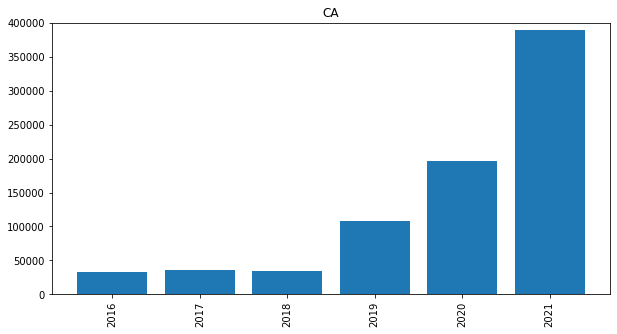

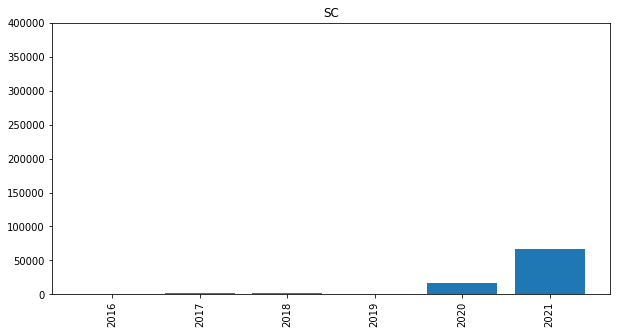

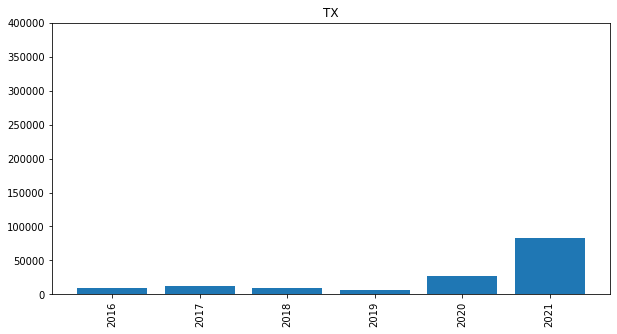

In [11]:
states = ["FL","CA","SC",'TX']
state_valuecount = df["State"].value_counts().index
for i in states:   
    fig, ax = plt.subplots()
    ax.bar(df[df["State"]==i]["year"].value_counts().index,df[df["State"]==i]["year"].value_counts().values)
    plt.xticks(rotation=90)
    fig.set_size_inches(10,5)
    ax.set_ylim(0,400000)
    plt.title(i)
    plt.show()

In [22]:
df["City"].value_counts().index[:10]

Index(['Miami', 'Orlando', 'Los Angeles', 'Houston', 'Charlotte', 'Raleigh',
       'Dallas', 'Baton Rouge', 'Austin', 'Tucson'],
      dtype='object')

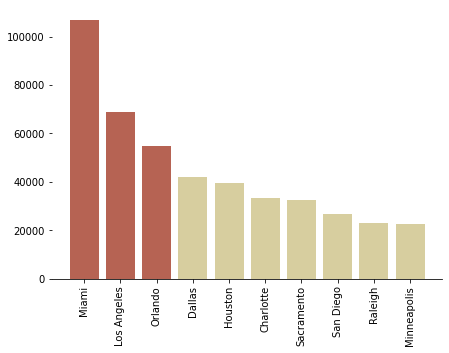

In [24]:
fig, ax = plt.subplots()
ax.bar(df["City"].value_counts().index[0:3],df["City"].value_counts().values[0:3],color="#B66353")
ax.bar(df["City"].value_counts().index[3:10],df["City"].value_counts().values[3:10],color="#D7CE9F")

fig.set_size_inches(7,5)
plt.xticks(rotation=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.get_yaxis().set_ticks([])
plt.show()

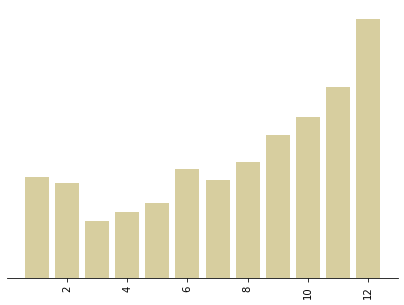

In [79]:
fig, ax = plt.subplots()
ax.bar(df_2021["mon"].value_counts().index,df_2021["mon"].value_counts().values,color="#D7CE9F")

fig.set_size_inches(7,5)
plt.xticks(rotation=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
plt.show()

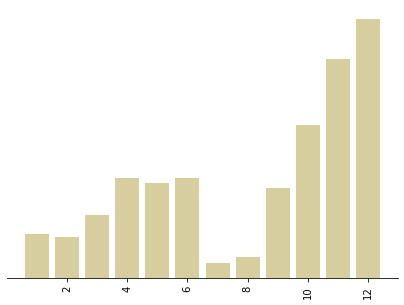

In [81]:
fig, ax = plt.subplots()
ax.bar(df[df["year"]!=2021]["mon"].value_counts().index,df[df["year"]!=2021]["mon"].value_counts().values,color="#D7CE9F")

fig.set_size_inches(7,5)
plt.xticks(rotation=90)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
plt.show()

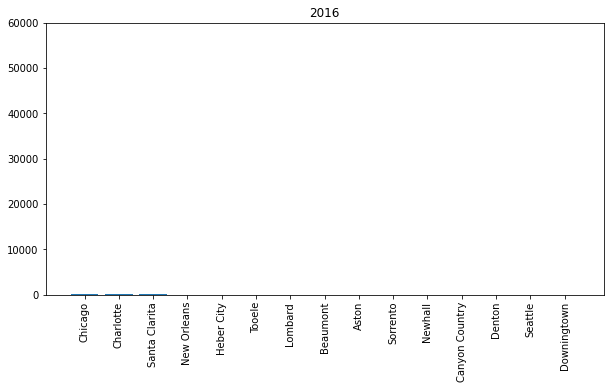

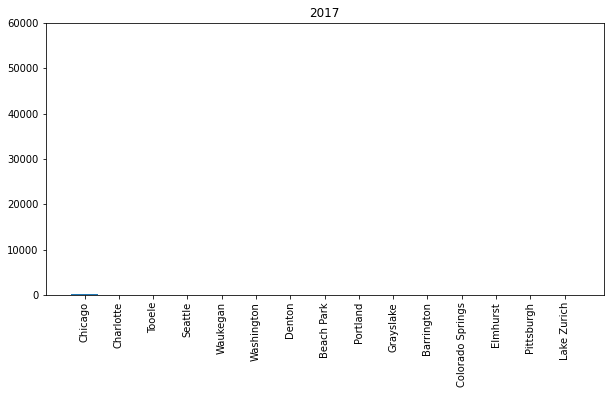

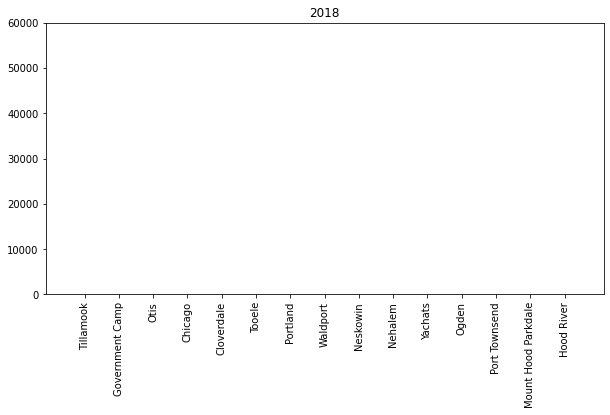

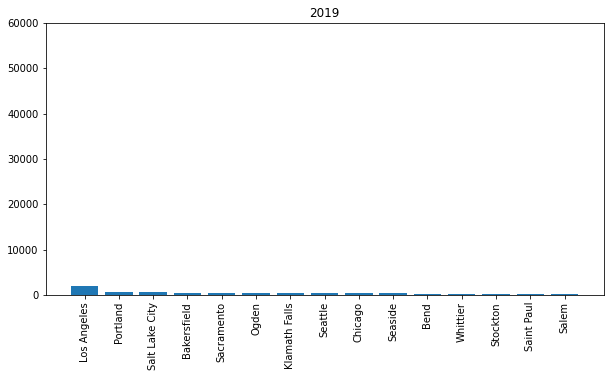

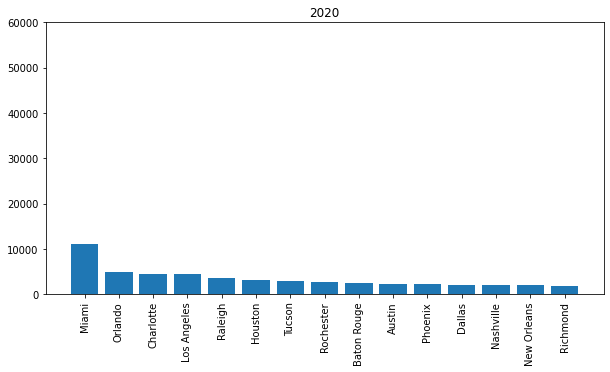

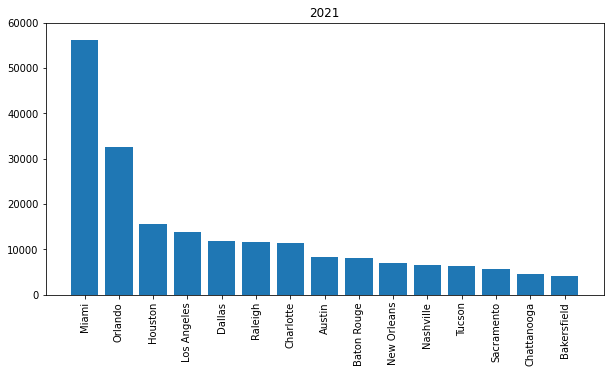

In [24]:
years = range(2016,2022)
for i in years:   
    fig, ax = plt.subplots()
    ax.bar(df[df["year"]==i]["City"].value_counts().index[:15],df[df["year"]==i]["City"].value_counts().values[:15])
    plt.xticks(rotation=90)
    fig.set_size_inches(10,5)
    ax.set_ylim(0,60000)
    plt.title(i)
    plt.show()

In [25]:
df_2021[df_2021["City"]=="Miami"].shape

(56300, 52)

In [157]:
df_2021[df_2021["City"]=="Miami"]["Severity"].value_counts()

2    56164
4      121
3       15
Name: Severity, dtype: int64

In [27]:
df["dayofweek"].value_counts(sort=False)

1    134229
2    142507
3    148520
4    148505
5    162753
6    117344
7     89460
Name: dayofweek, dtype: int64

In [28]:
df_miami = df[(df["City"]=="Miami")&(df["State"]=="FL")]
df_orl = df[(df["City"]=="Orlando")&(df["State"]=="FL")]
df_la = df[(df["City"]=="Los Angeles")&(df["State"]=="CA")]


In [29]:
df_miami.shape

(106896, 52)

/var/folders/1m/f637fb_s0hxb32hgmsjjq_hc0000gn/T/ipykernel_41379/3287033168.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([" ","Mon","Tue",'Wed','Thu','Fri','Sat','Sun'])


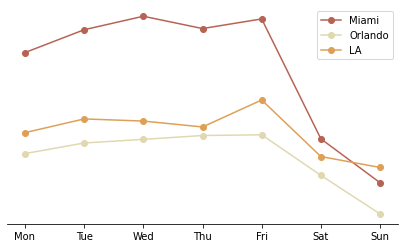

In [31]:
fig, ax = plt.subplots()
ax.plot(df_miami["dayofweek"].value_counts(sort=False).index,df_miami["dayofweek"].value_counts(sort=False).values,marker="o",color="#B66353",label='Miami')
ax.plot(df_orl["dayofweek"].value_counts(sort=False).index,df_orl["dayofweek"].value_counts(sort=False).values,marker="o",color="#E0D8B0",label='Orlando')
ax.plot(df_la["dayofweek"].value_counts(sort=False).index,df_la["dayofweek"].value_counts(sort=False).values,marker="o",color="#DEA057",label='LA')

ax.set_xticklabels([" ","Mon","Tue",'Wed','Thu','Fri','Sat','Sun'])
fig.set_size_inches(7,4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
plt.legend()
plt.show()

In [135]:
df_miami["mon"].value_counts().sort_index().index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

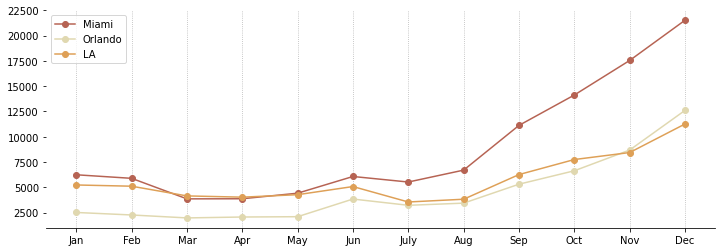

In [32]:
fig, ax = plt.subplots()
ax.plot(df_miami["mon"].value_counts().sort_index().index,df_miami["mon"].value_counts().sort_index().values,marker="o",color="#B66353",label='Miami')
ax.plot(df_orl["mon"].value_counts().sort_index().index,df_orl["mon"].value_counts().sort_index().values,marker="o",color="#E0D8B0",label='Orlando')
ax.plot(df_la["mon"].value_counts().sort_index().index,df_la["mon"].value_counts().sort_index().values,marker="o",color="#DEA057",label='LA')

fig.set_size_inches(12,4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
#ax.get_yaxis().set_ticks([])
plt.grid(axis="x",linestyle=":")
ax.set_xticks(range(1,13))
ax.set_xticklabels(["Jan","Feb","Mar",'Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'])
plt.legend()
plt.show()

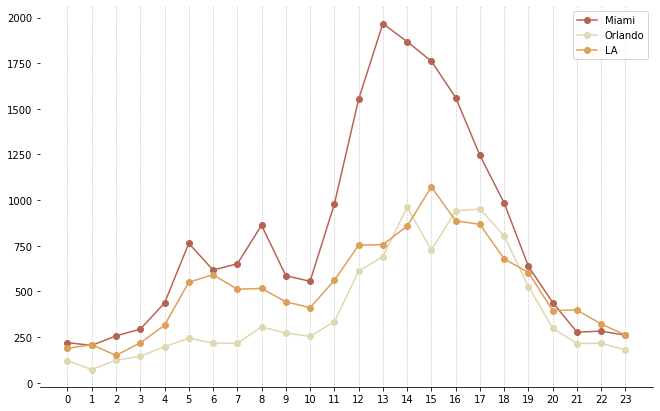

In [34]:
fig, ax = plt.subplots()
ax.plot(df_miami[df_miami["dayofweek"]==5]["hour"].value_counts().sort_index().index,df_miami[df_miami["dayofweek"]==5]["hour"].value_counts(sort=False).sort_index().values,color='#B66353',marker="o",label="Miami")
ax.plot(df_orl[df_orl["dayofweek"]==5]["hour"].value_counts().sort_index().index,df_orl[df_orl["dayofweek"]==5]["hour"].value_counts(sort=False).sort_index().values,color='#E0D8B0',marker="o",label="Orlando")
ax.plot(df_la[df_la["dayofweek"]==5]["hour"].value_counts().sort_index().index,df_la[df_la["dayofweek"]==5]["hour"].value_counts(sort=False).sort_index().values,color='#DEA057',marker="o",label="LA")

plt.xticks(range(0,24))
fig.set_size_inches(11,7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(axis="x",linestyle=":")
plt.legend()
plt.show()

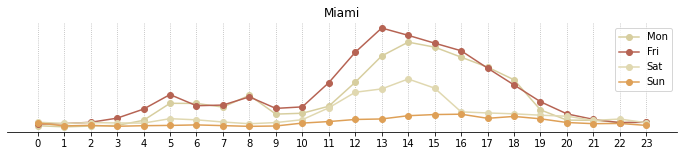

In [168]:
fig, ax = plt.subplots()
ax.plot(df_miami[df_miami["dayofweek"]==1]["hour"].value_counts().sort_index().index,df_miami[df_miami["dayofweek"]==1]["hour"].value_counts(sort=False).sort_index().values,color='#D7CE9F',marker="o",label="Mon")
ax.plot(df_miami[df_miami["dayofweek"]==5]["hour"].value_counts().sort_index().index,df_miami[df_miami["dayofweek"]==5]["hour"].value_counts(sort=False).sort_index().values,color='#B66353',marker="o",label="Fri")
ax.plot(df_miami[df_miami["dayofweek"]==6]["hour"].value_counts().sort_index().index,df_miami[df_miami["dayofweek"]==6]["hour"].value_counts(sort=False).sort_index().values,color='#E0D8B0',marker="o",label="Sat")
ax.plot(df_miami[df_miami["dayofweek"]==7]["hour"].value_counts().sort_index().index,df_miami[df_miami["dayofweek"]==7]["hour"].value_counts(sort=False).sort_index().values,color='#DEA057',marker="o",label="Sun")


plt.xticks(range(0,24))
fig.set_size_inches(12,2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])

plt.title("Miami")
plt.grid(axis="x",linestyle=":")
plt.legend()
plt.show()

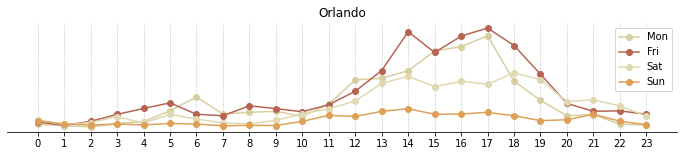

In [125]:
fig, ax = plt.subplots()
ax.plot(df_orl[df_orl["dayofweek"]==1]["hour"].value_counts().sort_index().index,df_orl[df_orl["dayofweek"]==1]["hour"].value_counts(sort=False).sort_index().values,color='#D7CE9F',marker="o",label="Mon")
ax.plot(df_orl[df_orl["dayofweek"]==5]["hour"].value_counts().sort_index().index,df_orl[df_orl["dayofweek"]==5]["hour"].value_counts(sort=False).sort_index().values,color='#B66353',marker="o",label="Fri")
ax.plot(df_orl[df_orl["dayofweek"]==6]["hour"].value_counts().sort_index().index,df_orl[df_orl["dayofweek"]==6]["hour"].value_counts(sort=False).sort_index().values,color='#E0D8B0',marker="o",label="Sat")
ax.plot(df_orl[df_orl["dayofweek"]==7]["hour"].value_counts().sort_index().index,df_orl[df_orl["dayofweek"]==7]["hour"].value_counts(sort=False).sort_index().values,color='#DEA057',marker="o",label="Sun")


plt.xticks(range(0,24))
fig.set_size_inches(12,2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])

plt.title("Orlando")
plt.grid(axis="x",linestyle=":")
plt.legend()
plt.show()

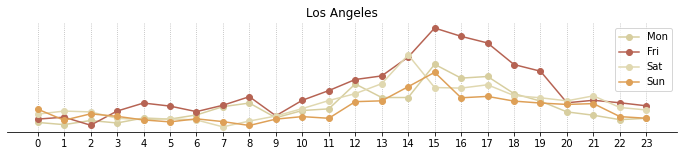

In [169]:
fig, ax = plt.subplots()
ax.plot(df_la[df_la["dayofweek"]==1]["hour"].value_counts().sort_index().index,df_la[df_la["dayofweek"]==1]["hour"].value_counts(sort=False).sort_index().values,color='#D7CE9F',marker="o",label="Mon")
ax.plot(df_la[df_la["dayofweek"]==5]["hour"].value_counts().sort_index().index,df_la[df_la["dayofweek"]==5]["hour"].value_counts(sort=False).sort_index().values,color='#B66353',marker="o",label="Fri")
ax.plot(df_la[df_la["dayofweek"]==6]["hour"].value_counts().sort_index().index,df_la[df_la["dayofweek"]==6]["hour"].value_counts(sort=False).sort_index().values,color='#E0D8B0',marker="o",label="Sat")
ax.plot(df_la[df_la["dayofweek"]==7]["hour"].value_counts().sort_index().index,df_la[df_la["dayofweek"]==7]["hour"].value_counts(sort=False).sort_index().values,color='#DEA057',marker="o",label="Sun")


plt.xticks(range(0,24))
fig.set_size_inches(12,2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])

plt.title("Los Angeles")
plt.grid(axis="x",linestyle=":")
plt.legend()
plt.show()

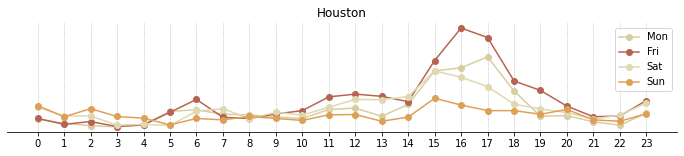

In [129]:
fig, ax = plt.subplots()
ax.plot(df_hou[df_hou["dayofweek"]==1]["hour"].value_counts().sort_index().index,df_hou[df_hou["dayofweek"]==1]["hour"].value_counts(sort=False).sort_index().values,color='#D7CE9F',marker="o",label="Mon")
ax.plot(df_hou[df_hou["dayofweek"]==5]["hour"].value_counts().sort_index().index,df_hou[df_hou["dayofweek"]==5]["hour"].value_counts(sort=False).sort_index().values,color='#B66353',marker="o",label="Fri")
ax.plot(df_hou[df_hou["dayofweek"]==6]["hour"].value_counts().sort_index().index,df_hou[df_hou["dayofweek"]==6]["hour"].value_counts(sort=False).sort_index().values,color='#E0D8B0',marker="o",label="Sat")
ax.plot(df_hou[df_hou["dayofweek"]==7]["hour"].value_counts().sort_index().index,df_hou[df_hou["dayofweek"]==7]["hour"].value_counts(sort=False).sort_index().values,color='#DEA057',marker="o",label="Sun")


plt.xticks(range(0,24))
fig.set_size_inches(12,2)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])

plt.title("Houston")
plt.grid(axis="x",linestyle=":")
plt.legend()
plt.show()

In [196]:
len(df_orl.Weather_Condition)

37643

In [200]:
type(df_orl.shape[0])

int

In [215]:
df_miami.Weather_Condition.value_counts().index[:4]

Index(['Fair', 'Mostly Cloudy', 'Partly Cloudy', 'Cloudy'], dtype='object')

In [216]:
df_orl.Weather_Condition.value_counts().index[:4]

Index(['Fair', 'Mostly Cloudy', 'Partly Cloudy', 'Cloudy'], dtype='object')

In [217]:
df_la.Weather_Condition.value_counts().index[:4]

Index(['Fair', 'Cloudy', 'Haze', 'Mostly Cloudy'], dtype='object')

In [218]:
df_orl.Weather_Condition.value_counts().index[:4]

Index(['Fair', 'Mostly Cloudy', 'Partly Cloudy', 'Cloudy'], dtype='object')

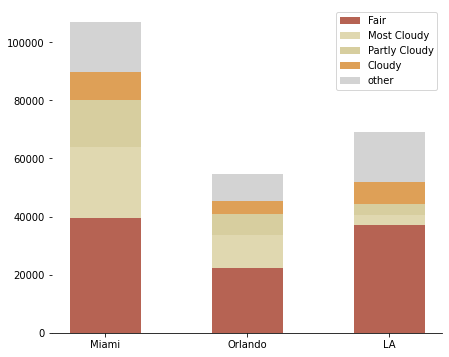

In [35]:
import numpy as np

label = ['Miami','Orlando','LA']

num_fair = [df_miami.Weather_Condition.value_counts().loc["Fair"],
df_orl.Weather_Condition.value_counts().loc["Fair"],
df_la.Weather_Condition.value_counts().loc["Fair"],]
num_fair=np.array(num_fair)

num_most_cloudy = [df_miami.Weather_Condition.value_counts().loc["Mostly Cloudy"],
df_orl.Weather_Condition.value_counts().loc["Mostly Cloudy"],
df_la.Weather_Condition.value_counts().loc["Mostly Cloudy"]]
num_most_cloudy=np.array(num_most_cloudy)

num_partly_cloudy = [df_miami.Weather_Condition.value_counts().loc["Partly Cloudy"],
df_orl.Weather_Condition.value_counts().loc["Partly Cloudy"],
df_la.Weather_Condition.value_counts().loc["Partly Cloudy"]]
num_partly_cloudy=np.array(num_partly_cloudy)

num_cloudy = [df_miami.Weather_Condition.value_counts().loc["Cloudy"],
df_orl.Weather_Condition.value_counts().loc["Cloudy"],
df_la.Weather_Condition.value_counts().loc["Cloudy"]]
num_cloudy=np.array(num_cloudy)


num_shape = [df_miami.shape[0],df_orl.shape[0],df_la.shape[0]]
num_shape = np.array(num_shape)

num_other = []
for i in range(0,3):
    n = 0
    n = num_shape[i] - num_fair[i]-num_most_cloudy[i]-num_partly_cloudy[i]-num_cloudy[i]
    num_other.append(n)
num_other = np.array(num_other)

wi=0.5
fig, ax = plt.subplots()
ax.bar(label,num_fair,color="#B66353",label = "Fair",width=wi)
ax.bar(label,num_most_cloudy,color="#E0D8B0",label="Most Cloudy",bottom = num_fair,width=wi)
ax.bar(label,num_partly_cloudy,color="#D7CE9F",label="Partly Cloudy",bottom = (num_fair+num_most_cloudy),width=wi)
ax.bar(label,num_cloudy,color="#DEA057",label="Cloudy",bottom = (num_fair+num_most_cloudy+num_partly_cloudy),width=wi)
ax.bar(label,num_other,color="#d3d3d3",label="other",bottom = (num_fair+num_most_cloudy+num_partly_cloudy+num_cloudy),width=wi)


fig.set_size_inches(7,6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.legend()
plt.show()

In [252]:
df_miami.groupby("Weather_Condition")["Severity"].value_counts()

Weather_Condition        Severity
Cloudy                   2            6530
                         4              12
                         3               5
Cloudy / Windy           2              55
Fair                     2           27571
                         4              54
                         3              10
                         1               3
Fair / Windy             2             241
Fog                      2             263
Haze                     2              76
Heavy Rain               2             265
                         4               2
                         3               1
Heavy Rain / Windy       2              18
Heavy T-Storm            2             287
Heavy T-Storm / Windy    2              15
Light Drizzle            2              14
Light Rain               2            3033
                         4               5
                         3               2
Light Rain / Windy       2              92
Light Rain with Thun